<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Sentiment_Analysis_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction
This is the second notebook for IMDb sentiment analysis (First notebook: Bag of Words Meets Bags of Popcorn: CountVectorizer). In this notebook, instead of CountVectorizer, we will be analyzing the movie reviews by using TF-IDF (Term Frequency - Inverse Document Frequency). Also, we could compare how differently these methods work and the performance of the predictions. Above all, the most important takeaway from this notebook is to learn how to use TF-IDF and the usage of important TF-IDF parameters.

In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [8]:
# Read the data

X_train = pd.read_csv("/content/labeledTrainData.tsv",quoting = 3, delimiter = "\t", header= 0)
X_test = pd.read_csv("/content/testData.tsv", quoting = 3, delimiter = "\t", header = 0)

In [9]:
# Read only the first 600 sentences of the first review.

X_train['review'][0][:600]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br />'

In [10]:
# Read only the first 600 sentences of the first review.

X_test['review'][0][:600]

'"Naturally in a film who\'s main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce\'s short story lends the film a ready made structure as perfect as a '

In [11]:
print('Training set dimension:',X_train.shape)
print('Test set dimension:',X_test.shape)

Training set dimension: (25000, 3)
Test set dimension: (9697, 2)


In [12]:
X_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## Text Preprocessing

In [13]:
from bs4 import BeautifulSoup
import re
import nltk

In [16]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
def prep(review):

    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()

    # Remove non-letters
    review = re.sub("[^a-zA-Z]", " ", review)

    # Lower case
    review = review.lower()

    # Tokenize to each word.
    token = nltk.word_tokenize(review)

    # Stemming
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]

    # Join the words back into one string separated by space, and return the result.
    return " ".join(review)

In [18]:
# test whether the function successfully preprocessed.
X_train['review'].iloc[:2].apply(prep).iloc[0]

'with all this stuff go down at the moment with mj i ve start listen to his music watch the odd documentari here and there watch the wiz and watch moonwalk again mayb i just want to get a certain insight into this guy who i thought was realli cool in the eighti just to mayb make up my mind whether he is guilti or innoc moonwalk is part biographi part featur film which i rememb go to see at the cinema when it was origin releas some of it has subtl messag about mj s feel toward the press and also the obvious messag of drug are bad m kay visual impress but of cours this is all about michael jackson so unless you remot like mj in anyway then you are go to hate this and find it bore some may call mj an egotist for consent to the make of this movi but mj and most of his fan would say that he made it for the fan which if true is realli nice of him the actual featur film bit when it final start is onli on for minut or so exclud the smooth crimin sequenc and joe pesci is convinc as a psychopath

In [22]:
# If there is no problem at the previous cell, let's apply to all the rows.
X_train['clean'] = X_train['review'].apply(prep)

<ipython-input-17-c02a95becae4>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review,'html.parser').get_text()


In [23]:
X_test['clean'] = X_test['review'].apply(prep)

<ipython-input-17-c02a95becae4>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review,'html.parser').get_text()


In [21]:
X_train['clean'].iloc[3]

'it must be assum that those who prais this film the greatest film opera ever didn t i read somewher either don t care for opera don t care for wagner or don t care about anyth except their desir to appear cultur either as a represent of wagner s swan song or as a movi this strike me as an unmitig disast with a leaden read of the score match to a tricksi lugubri realis of the text it s question that peopl with idea as to what an opera or for that matter a play especi one by shakespear is about should be allow anywher near a theatr or film studio syberberg veri fashion but without the smallest justif from wagner s text decid that parsif is about bisexu integr so that the titl charact in the latter stage transmut into a kind of beatnik babe though one who continu to sing high tenor few if ani of the actor in the film are the singer and we get a doubl dose of armin jordan the conductor who is seen as the face but not heard as the voic of amforta and also appear monstrous in doubl exposur 

In [24]:
print('Training dim:',X_train.shape, 'Test dim:', X_test.shape)

Training dim: (25000, 4) Test dim: (9697, 3)


TF-IDF
TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix).

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [26]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# vocabulary is the parameter that the vectorizer creates the matrix by using only input data or some other source
# Other parameters are self-explanatory and already mentioned in other notebooks.

tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)

In [27]:
# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))

train_tv = tv.fit_transform(X_train['clean'])
test_tv = tv.transform(X_test['clean'])

In [29]:
# Create the list of vocabulary used for the vectorizer.

vocab = tv.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()
print(vocab[:5])

['aaron' 'abandon' 'abandon the' 'abbi' 'abbot']


In [30]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 40000


In [31]:
dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist,columns = vocab)

As you can see the above, due to the vocabulary option 'set(words.words())', a lot of vocabularies are added to the matrix even more than review's vocabularies.

In [32]:

checking


,aaron,abandon,abandon the,abbi,abbot,abbott,abc,abduct,abid,abil,...,zombi flick,zombi in,zombi is,zombi movi,zone,zoo,zoom,zoom in,zorro,zu
0,2.409261,15.446734,2.04386,1.271492,1.926163,1.954295,9.173914,3.92278,2.191766,26.732343,...,2.741852,3.047338,2.765339,5.618519,10.216062,2.607176,4.557295,2.020315,3.593419,2.590209


The number of the feature of the matrix are almost ten times larger than the number of reviews. This can cause the curse of dimensionality but this project is for studying and trying many features of text mining tools so I decide to leave the option. Instead, the regularization term must be tuned with care when optimizing the parameters.

In [33]:
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)

Training dim: (25000, 40000) Test dim: (9697, 40000)


## Visualization

WordCloud
As alluded in the first notebook, the drawback for WordCloud is that the graphics only reflect the frequency of words, which can cause some uninformative words frequently appeared in the text can be highlighted on the cloud instead of informative words which is less frequently appeared in the text. These kind of uninformative words could be stopwords or just some words frequently appeared in documents that particularly longer than other documents. Although the WordCloud is not the best visualization method to show all the aspect of the data, it is worth plotting them so that we can quickly and intuitively see what the text is about.

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [35]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


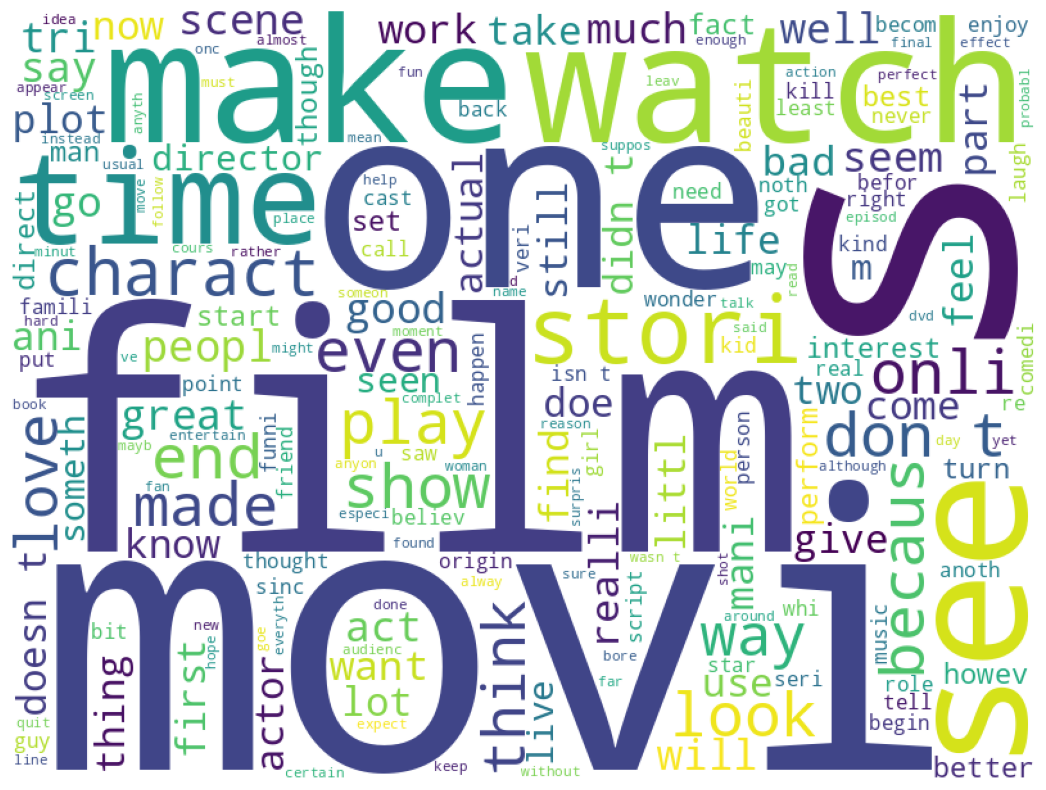

In [36]:
cloud(' '.join(X_train['clean']))

As expected, most of emphasized words are just normal words like "film", "one", "movie", "show", and "stori" which appear to be not informative to distinguish one document from the others or distinguish between negative and positive movie reviews.

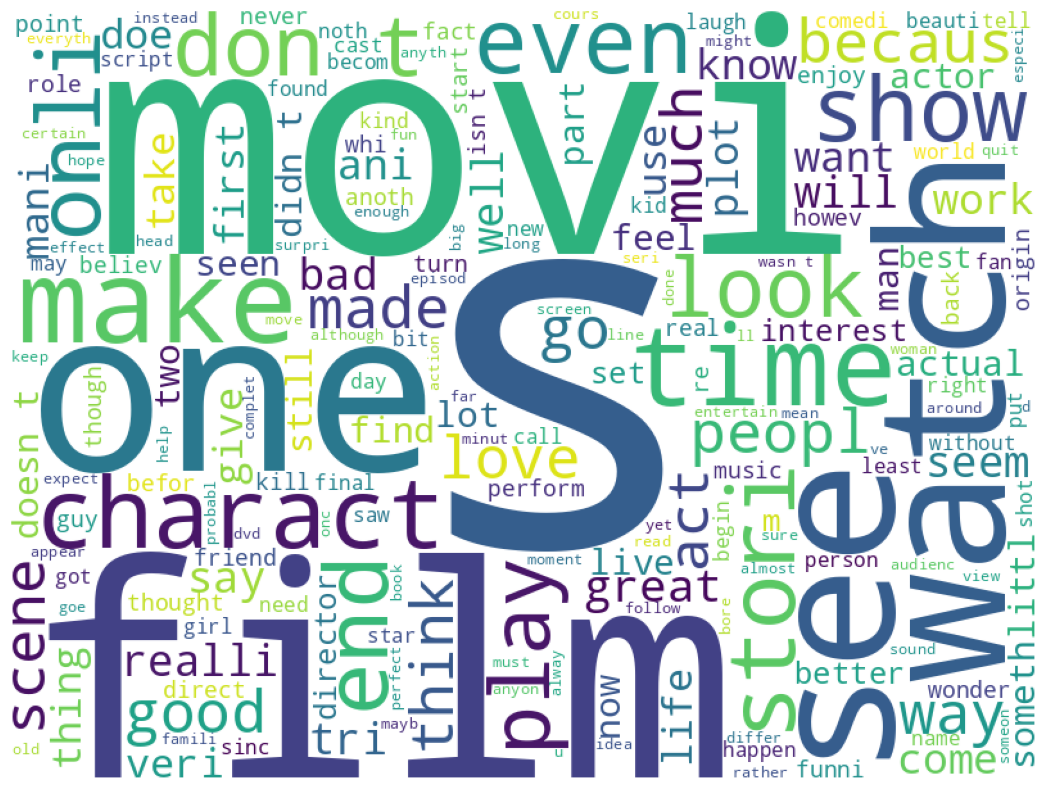

In [37]:
cloud(' '.join(X_test['clean']))

#  Distribution

In [38]:
# We need to split each words in cleaned review and then count the number of each rows of data frame.

X_train['freq_word'] = X_train['clean'].apply(lambda x: len(str(x).split()))
X_train['unique_freq_word'] = X_train['clean'].apply(lambda x: len(set(str(x).split())))

X_test['freq_word'] = X_test['clean'].apply(lambda x: len(str(x).split()))
X_test['unique_freq_word'] = X_test['clean'].apply(lambda x: len(set(str(x).split())))

The black contour of the distribution graphs represent the normal distribution if the data would have been distributed as normal. Compared to the black contour, the actual distribution is pretty skwed; therefore, median would be better to use as a measure of representative of data since mean is very sensitive to outliers and noise especially the distribution is highly skewed. As shown in the legend, the mean of the word frequency is 236.89 and the mean of the unique word is 135.61. It means 236.89 words and 135.61 unique words are used for each review. Also the dashed lines represent the median of the distribution. Another thing to notice is that the median values are very closely located to the normal distribution's mean points. Compared to CountVectorizer methods, there are 117.39 words used more for train set and 41.57 words used more for test set. This is due to the different parameter setting and we used more words for max features for TF-IDF. The distribution of the graphs are somehow similar to that of CountVectorizer.

<ipython-input-39-75cbd277f8dd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)


median of word frequency:  177.0


<ipython-input-39-75cbd277f8dd>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)


median of uniuqe word frequency:  112.0


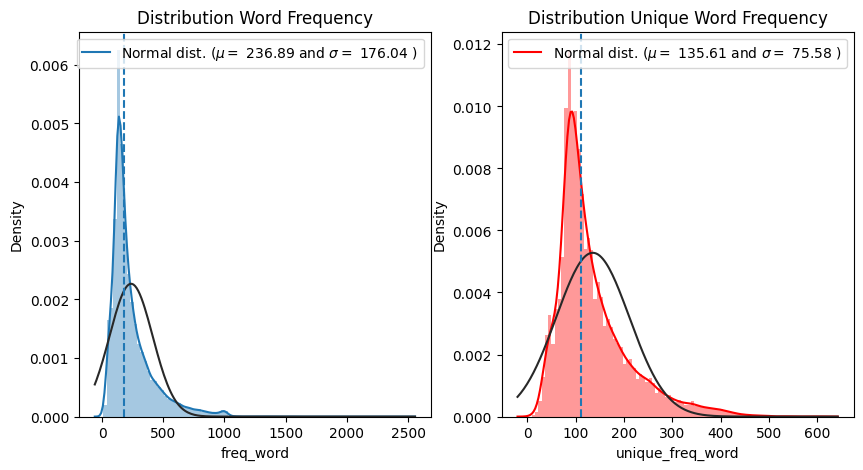

In [39]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(X_train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(X_train['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X_train['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", X_train['freq_word'].median())


sns.distplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(X_train['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X_train['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X_train['unique_freq_word'].median())

median of word frequency:  177.0
median of uniuqe word frequency:  112.0


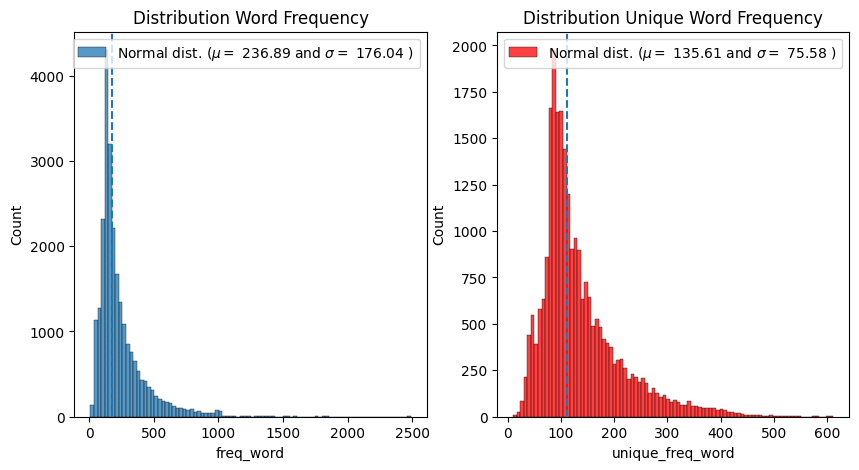

In [41]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.histplot(X_train['freq_word'], bins = 90, ax=axes[0])
(mu0, sigma0) = stats.norm.fit(X_train['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X_train['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", X_train['freq_word'].median())


sns.histplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r')
(mu1, sigma1) = stats.norm.fit(X_train['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X_train['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X_train['unique_freq_word'].median())

#Modeling


As text data usually is very sparse and has a high dimensionality, using linear, and simple models such as Linear Support Vector Machine, Bernoulli Naive Bayes, Logistic Regression or MultiLayer Perceptron would be better choice rather than using Random Forest.

In [42]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
kfold = StratifiedKFold( n_splits = 5,shuffle=True, random_state = 2018 )

#Support Vector Machine

In [45]:
# LinearSVC

sv = LinearSVC(random_state=2018)

param_grid2 = {
    'loss':['squared_hinge'],
    'class_weight':[{1:4}],
    'C': [0.2]
}


gs_sv = GridSearchCV(sv, param_grid = [param_grid2], verbose = 1, cv = kfold, n_jobs = 1, scoring = 'roc_auc')
gs_sv.fit(train_tv, X_train['sentiment'])
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)

# {'C': 0.1, 'class_weight': {1: 3}, 'loss': 'squared_hinge'} - 0.87220
# {'C': 0.1, 'class_weight': {1: 4}, 'loss': 'squared_hinge'} - 0.86060
# {'C': 0.2, 'class_weight': {1: 4}, 'loss': 'squared_hinge'} - 0.87952

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.2, 'class_weight': {1: 4}, 'loss': 'squared_hinge'}


In [46]:
submission1 = gs_sv.predict(test_tv)

In [47]:
print(gs_sv.best_score_)

0.96533488


#Bernoulli Naive Bayes Classifier

In [48]:
bnb = BernoulliNB()
gs_bnb = GridSearchCV(bnb, param_grid = {'alpha': [0.001],
                                         'binarize': [0.001]}, verbose = 1, cv = kfold, n_jobs = 1, scoring = "roc_auc")
gs_bnb.fit(train_tv, X_train['sentiment'])
gs_bnb_best = gs_bnb.best_estimator_
print(gs_bnb.best_params_)

# {'alpha': 0.001, 'binarize': 0.001} - 0.86960

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 0.001, 'binarize': 0.001}


In [49]:
submission2 = gs_bnb.predict(test_tv)

In [ ]:
print(gs_bnb.best_score_)

#Perceptron

In [51]:
MLP = MLPClassifier(random_state = 2018)

mlp_param_grid = {
    'hidden_layer_sizes':[(5)],
    'activation':['relu'],
    'solver':['adam'],
    'alpha':[0.3],
    'learning_rate':['constant'],
    'max_iter':[1000]
}


gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, scoring = 'roc_auc', n_jobs= 1, verbose = 1)
gsMLP.fit(train_tv,X_train['sentiment'])
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_

# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89996
# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89896
# {'activation': 'relu', 'alpha': 0.2, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90284
# {'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90356

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [ ]:
submission3 = gsMLP.predict(test_tv)

In [53]:
print(gsMLP.best_score_)

0.965644256


#Logistic Regression

In [54]:
lr = LogisticRegression(random_state = 2018)

lr2_param = {
    'penalty':['l2'],
    'dual':[False],  # Change 'dual' to False
    'C':[6],
    'class_weight':[{1:1}]
}

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(train_tv, X_train['sentiment'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

# {'C': 6, 'class_weight': {1: 1}, 'dual': True, 'penalty': 'l2'} - 90.360

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 6, 'class_weight': {1: 1}, 'dual': False, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
submission6 = lr_CV.predict(test_tv)

In [56]:
print(lr_CV.best_score_)

0.965702112


Among many models, the best score is 90.36% performed by Logistic Regression. Compared to the best model (linear SVM) based on CountVectorizer, it was improved by approximately 2 percents. Not only Logistic Regression but also all the models show the improvement except Linear SVM. This improvement is due to the fact that TF-IDF is more complicated method than simple word counting method (CountVectorizer) and also the max features we set for TF-IDF are way more than that of CountVectorizer (40000 vs 18000).

#Investigating Model Coefficients


Since there are 40000 features, it is impossible to look at all of the coefficients at the same time. Therefore, we can sort them and look at the largest coefficients. The following bar chart shows the 30 largest and 30 smallest coefficients of the Logistic Regression model, with the bars showing the size of each coefficients.

In [ ]:
# Extract the coefficients from the best model Logistic Regression and sort them by index.
coefficients = logi_best.coef_
index = coefficients.argsort()

In [ ]:
# Extract the feature names.
feature_names = np.array(tv.get_feature_names())

In [ ]:
# From the smallest to largest.
feature_names[index][0][:30]

In [ ]:
# From the smallest to largest.
feature_names[index][0][-31::1]

In [ ]:
# feature names: Smallest 30 + largest 30.
feature_names_comb = list(feature_names[index][0][:30]) + list(feature_names[index][0][-31::1])

In [ ]:
# coefficients magnitude: Smallest 30 + largest 30.
index_comb = list(coefficients[0][index[0][:30]]) + list(coefficients[0][index[0][-31::1]])

In [ ]:
# Make sure the x-axis be the number from 0 to the length of the features selected not the feature names.
# Once the bar is plotted, the features are placed as ticks.
plt.figure(figsize=(25,10))
barlist = plt.bar(list(i for i in range(61)), index_comb)
plt.xticks(list(i for i in range(61)),feature_names_comb,rotation=75,size=15)
plt.ylabel('Coefficient magnitude',size=20)
plt.xlabel('Features',size=20)

# color the first smallest 30 bars red
for i in range(30):
    barlist[i].set_color('red')

plt.show()

As mentioned in previous notebook about CountVectorizer, the blue bar indicates positive movie reviews. On the other hand the red bar indicates negative move reviews. Interestingly, there are many words in common on both barplot based on CountVectorizer and TF-IDF such as: worst, bad, aw, wast, disappoint, excel, perfect, great, high recommend, etc.

#Submission

In [ ]:
output = pd.DataFrame( data = {'id': X_test['id'], 'sentiment': submission6 })
output.to_csv('submission26.csv', index = False, quoting = 3)